Paso 1: Importar las dependencias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Paso 2: Cargar la información

In [21]:
ls

RecomendationSystem.ipynb  ml-latest-small/


In [22]:
ratings = pd.read_csv("ml-latest-small/ratings.csv")

In [23]:
movies = pd.read_csv("ml-latest-small/movies.csv")

In [25]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [26]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Paso 3: Exploratory Data Analysis

In [30]:
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average number of ratings per user: 165.3
Average number of ratings per movie: 10.37


Distribución de calificaciones de películas

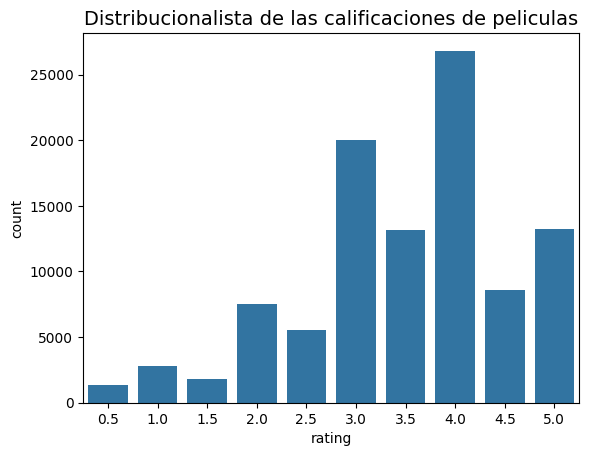

In [33]:
sns.countplot(x='rating', data=ratings)
plt.title("Distribucionalista de las calificaciones de peliculas", fontsize=14)
plt.show()

In [35]:
print(f"Calificación global media: {round(ratings['rating'].mean(), 2)}.")

Calificación global media: 3.5.


In [39]:
mean_ratings = ratings.groupby('userId')['rating'].mean()
print(f"Calificación media por usuario: {round(mean_ratings.mean(), 2)}.")

Calificación media por usuario: 3.66.


¿Qué películas son las más valoradas?

In [40]:
ratings['movieId'].value_counts()

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
160341      1
160527      1
160836      1
163937      1
103085      1
Name: count, Length: 9724, dtype: int64

In [49]:
movies_ratings = ratings.merge(movies, on="movieId")
movies_ratings['title'].value_counts()[0:10]
# movies_ratings['title'].value_counts()[0:10]

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64

¿Cuáles son las películas con las calificaciones más bajas y más altas?

In [51]:
mean_ratings = ratings.groupby('movieId')[['rating']].mean()
lowest_rated = mean_ratings['rating'].idxmin()

movies[movies['movieId'] == lowest_rated]

,movieId,title,genres
2689,3604,Gypsy (1962),Musical


In [54]:
highest_rated = mean_ratings['rating'].idxmax()
movies[movies['movieId'] == highest_rated]

,movieId,title,genres
48,53,Lamerica (1994),Adventure|Drama


In [55]:
ratings[ratings['movieId'] == highest_rated]

,userId,movieId,rating,timestamp
13368,85,53,5.0,889468268
96115,603,53,5.0,963180003
